# 2章　パーセプトロン

2入力のパーセプトロンで AND NAND OR ゲートを実装する  
動作原理

\begin{cases} 
    0 \quad ( w_{1}x_{1} + w_{2}x_{2} <=　{θ}) \\
    1 \quad ( w_{1}x_{1} + w_{2}x_{2} >　{θ}) \\
            \end{cases} 
      
w1 w2 θ の値でゲートを作用させる


In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
AND(0, 0)

0

In [3]:
AND(1, 0)

0

In [4]:
AND(0, 1)

0

In [5]:
AND(1, 1)

1

In [6]:
import numpy as np

In [7]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [8]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [9]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [10]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

# 3章　活性化関数

In [11]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [12]:
def step_function(x):
    y = x > 0
    # bool to int 
    return y.astype(np.int)

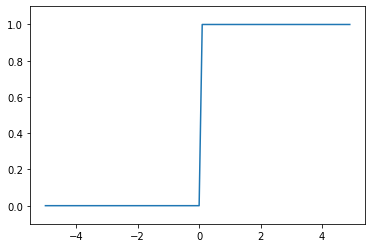

In [13]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

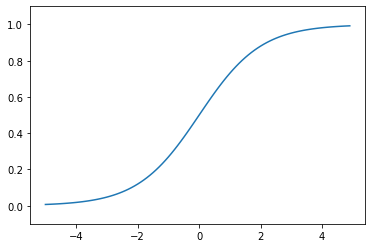

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [16]:
def relu(x):
    return np.maximum(0, x)

In [17]:
def identity_function(x):
    return x

In [18]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network
    
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [19]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


[0.31682708 0.69627909]


普通のソフトマックスだとオーバーフローになるのでソフトマックスの分母分子にCをかけて変形する

In [20]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    # numpy形式の多クラス確率表現を返す
    return exp_a / sum_exp_a

load_mnistの形式　(訓練画像、訓練ラベル), (テスト画像、テストラベル)

In [21]:
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [22]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [23]:
from PIL import Image

In [24]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [25]:
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


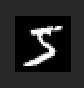

推論処理

In [26]:
import pickle

In [27]:
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

In [28]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [29]:
x, t = x_test, t_test

In [30]:
network = init_network()

In [31]:
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/var/folders/wq/drpdghd906v3k864t_7dnrw00000gn/T/ipykernel_51850/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.9207


In [32]:
x, t = x_test, t_test
network = init_network()
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9207


/var/folders/wq/drpdghd906v3k864t_7dnrw00000gn/T/ipykernel_51850/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [33]:
print(t[9900:10000])

[8 9 0 1 2 3 4 5 6 7 8 0 1 2 3 4 7 8 9 7 8 6 4 1 9 3 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 6 5 3 3 3 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 5 2 4 9
 4 3 6 4 1 7 2 6 5 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6]


In [34]:
print(p)

[8 4 0 1 2 9 4 5 6 7 8 0 1 2 3 4 9 8 9 7 8 6 4 1 9 3 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 0 6 3 3 8 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 3 2 4 9
 4 2 6 4 1 7 2 6 2 0 1 2 8 4 5 6 7 8 9 0 1 2 3 4 8 6]


# 4章　学習

In [35]:
def cross_entropy(y, t):
    delta = le-7
    return -np.sum(t * np.log(y + delta))

In [36]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True, normalize=True)

In [37]:
print(x_train.shape)

(60000, 784)


In [38]:
print(t_train.shape)

(60000, 10)


バッチ化対応の交差エントロピー誤差の計算  
batch_size行、10列の予測データと正解ラベルを1行, batch_size * 10 行にすることで計算効率を高める
testはone_hot表現なので　(np.log(〜) * t )の tは省略している
(tが0の要素は交差エントロピー誤差も0だから無視できる)

In [39]:
print(x_train.reshape(1, x_train.size))

[[0. 0. 0. ... 0. 0. 0.]]


In [40]:
def cross_entropy(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]))

In [41]:
print(t_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [42]:
print(t_train.reshape(1, t_train.size))

[[0. 0. 0. ... 0. 1. 0.]]


In [43]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h) / (2 * h))

x.size が次元数  
各項(idx)ごとに偏微分していく  
(偏微分する項以外はxの値をそのまま代入、平面で捉えて接戦の傾きを近似的に出力)

In [44]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
        
        return grad

In [45]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

In [46]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 0.])

In [47]:
#　最急降下法の実装
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        # 重みを更新
        x -= lr * grad
        
    return x

In [48]:
gradient_descent(function_2, init_x=np.array([-3.0, 4.0]), lr = 0.1, step_num=100)

array([-6.10953066e-10,  4.00000000e+00])

In [49]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [50]:
class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [51]:
# 初期化
net = SimpleNet()
print(net.W)

[[-0.92026143 -1.06118732  1.24670184]
 [ 1.88334628  0.16306147  0.04301597]]


In [52]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.14285479 -0.48995707  0.78673548]


In [53]:
np.argmax(p)

0

In [54]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.9957433263601707

In [55]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.31649426  0.06183647 -0.37833072]
 [ 0.47474139  0.0927547  -0.56749609]]


In [56]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads


train acc, test acc | 0.13496666666666668, 0.1343
train acc, test acc | 0.77895, 0.7853
train acc, test acc | 0.87365, 0.8786
train acc, test acc | 0.8969833333333334, 0.8995
train acc, test acc | 0.9069333333333334, 0.9106
train acc, test acc | 0.9143666666666667, 0.918
train acc, test acc | 0.9195, 0.9215
train acc, test acc | 0.9241333333333334, 0.9257
train acc, test acc | 0.9272166666666667, 0.9286
train acc, test acc | 0.9313666666666667, 0.9319
train acc, test acc | 0.9347833333333333, 0.9341
train acc, test acc | 0.9375666666666667, 0.9379
train acc, test acc | 0.93965, 0.94
train acc, test acc | 0.9422166666666667, 0.9422
train acc, test acc | 0.9439833333333333, 0.9426
train acc, test acc | 0.9456, 0.9447
train acc, test acc | 0.9480166666666666, 0.946


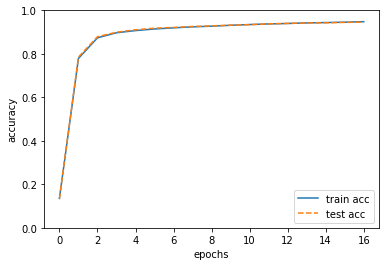

In [58]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 5章　誤差逆伝播法